# Using Index Tables

## Learning Objectives

In this tutorial, we will:
- discuss the purpose and scope of secondary index tables in LSDB
- explore using index tables to find GAIA objects, by designation

## Introduction

HATS catalogs are partitioned spatially, typically on right ascension and declination. This makes finding objects in a particular area of the sky very straightforward. However, you may occassionally only know the object by the survey-assigned identifier.

HATS supports creating additional secondary index tables, stored separately from the HATS catalog. You can find more information about creating these index tables in the [hats-import documentation](https://hats-import.readthedocs.io/en/latest/guide/index_table.html), or request that your archive provider create an index table for your use.

## 1. Load a catalog collection

HATS catalogs and supplemental tables can be gathered together into a "catalog collection". In this way, margins and index tables can be accessed without needing to know their subdirectories. 

GAIA is available on data.lsdb.io in the form of a catalog collection.

In [5]:
import lsdb

gaia = lsdb.open_catalog("https://data.lsdb.io/hats/gaia_dr3/")

We can inspect the catalog's collection properties and find which columns have secondary index tables.

In [6]:
gaia.hc_collection.all_indexes.keys()

dict_keys(['source_id'])

## 2. Find items by ID

Let's create some list of designations that we're interested in. The ones here have no special signficance, but are not near each other on the sphere.

This small set of GAIA designations are in just a handful of partitions. Let's check the index catalog, and see if we can reduce this list of IDs into just those pixels of interest.

In [ ]:
ids = [
    6350084614282952448,
    4684296460655809408,
    4684296460655681280,
    6350084408124522368,
    6379030430412267264,
    6397962092201358080,
    999999988604363776,
]

In [8]:
id_filtered = gaia.id_search(values={"source_id": ids})

Searching for source_id=[6350084614282952448, 4684296460655809408, 4684296460655681280, 6350084408124522368, 6379030430412267264, 6397962092201358080, 999999988604363776]


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Pixels containing objects of interest'}>)

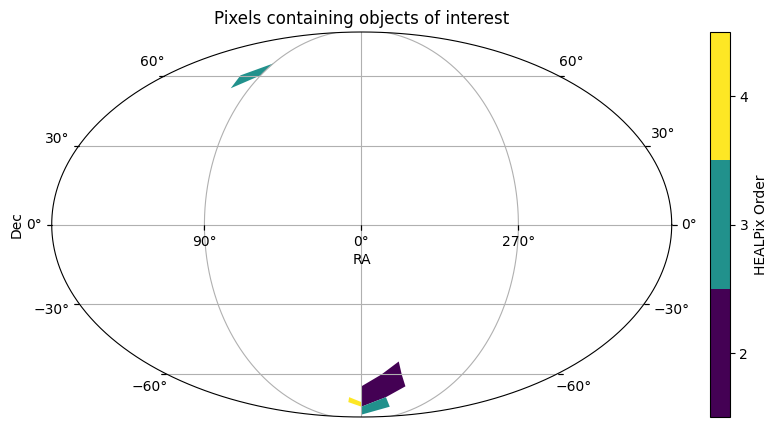

In [9]:
id_filtered.plot_pixels(plot_title="Pixels containing objects of interest")

In [10]:
id_filtered.compute()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
_healpix_29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
500000002326108747,1636148068921376768,Gaia DR3 999999988604363776,999999988604363776,1146519553,2016.0,104.910499,0.416448,55.969686,0.392039,1.501113,0.662432,2.266063,1.077911,1.004717,0.509705,-0.39043,0.407673,0.166491,-0.283951,-0.210769,-0.166695,-0.395157,-0.383997,-0.082387,0.571293,-0.097417,-0.023115,279,0,278,1,0.190794,302.275909,0.918131,0.573547,95,False,<NA>,1.231943,0.12604,0.02382,-0.028157,-0.177176,-0.060274,0.381471,32,19,0.800948,34,34,0,0.043367,8.364323,0,0,1.006963,0.065047,0.08709,0.127981,0.628179,-134.500015,20.566761,23.053226,-39.491501,False,284,156.458699,0.820939,190.584991,20.201368,26,56.254621,9.234386,6.091863,20.963146,28,168.634235,9.440611,17.86264,19.180531,1.437369,0,0,0,0,0,1.782616,0.761778,1.020838,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NOT_AVAILABLE,160.447923,23.310772,99.891286,33.041242,False,False,0,False,False,False,False,False,False,False,False,0.0,0.0,0.999994,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<N

## About

**Authors**:  Melissa DeLucchi

**Last updated /verified on**:  October 2, 2025

If you use `lsdb` for published research, please cite following [instructions](https://docs.lsdb.io/en/stable/citation.html).